In [1]:
from pyMON.pyMON import pyMON
import lightkurve as lk 
%matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
## Load KEPSEISMIC lightcurve for KIC 2707716

Star_ID = 2707716

filename_lc = f'./hlsp_kepseismic_kepler_phot_kplr00{Star_ID}-55d_kepler_v1_cor-filt-inp.fits'

hdul_lc = fits.open(filename_lc)

star_lc = Table(hdul_lc[1].data).to_pandas()

hdul_lc.close()

time = star_lc.TIME.values

### Load KEPSEISMIC power spectrum for KIC 2707716

filename_psd = f'./hlsp_kepseismic_kepler_phot_kplr00{Star_ID}-55d_kepler_v1_cor-psd-filt-inp.fits'

hdul_psd = fits.open(filename_psd)

star_psd = Table(hdul_psd[1].data).to_pandas()

hdul_psd.close()

frequency, power = star_psd.TIME.values, star_psd.FLUX.values

frequency = frequency * 10**6   # convert to muHz

Parameters for 2707716:
White noise metric=  383.94696775033657  ppm^2/muHz
Measured numax =  30.026497971874665
Measured Amplitude =  9367.76008776067
Measured width =  13.835523442319083
------------------------------------------------------
Running sampling routine:


 99%|████████████████████████████████████████▍| 493/500 [00:06<00:00, 79.12it/s]

Parameters for 2707716:
Nyquist frequency (from light curve) = 283.2099728978449 muHz
Measured numax =  30.026497971874665 +/- 0.7261811534325316 muHz ( 2.418467695142916 %)
Measured Amplitude =  9367.76008776067 +/- 937.9922359034499 ppm^2/muHz
Measured width =  13.835523442319083 +/- 0.9138459458926332 muHz


,Star_ID,numax_predicted,Dnu_relation,lowerp,upperp,sm,background_model,numax_measured,numax_uncertainty,peak_measured,peak_uncertainty,width_measured,width_uncertainty,mc_iters
0,2707716,29.718308,pySYD,None,None,2,linear,30.026498,0.726181,9367.760088,937.992236,13.835523,0.913846,500


100%|█████████████████████████████████████████| 500/500 [00:06<00:00, 76.12it/s]


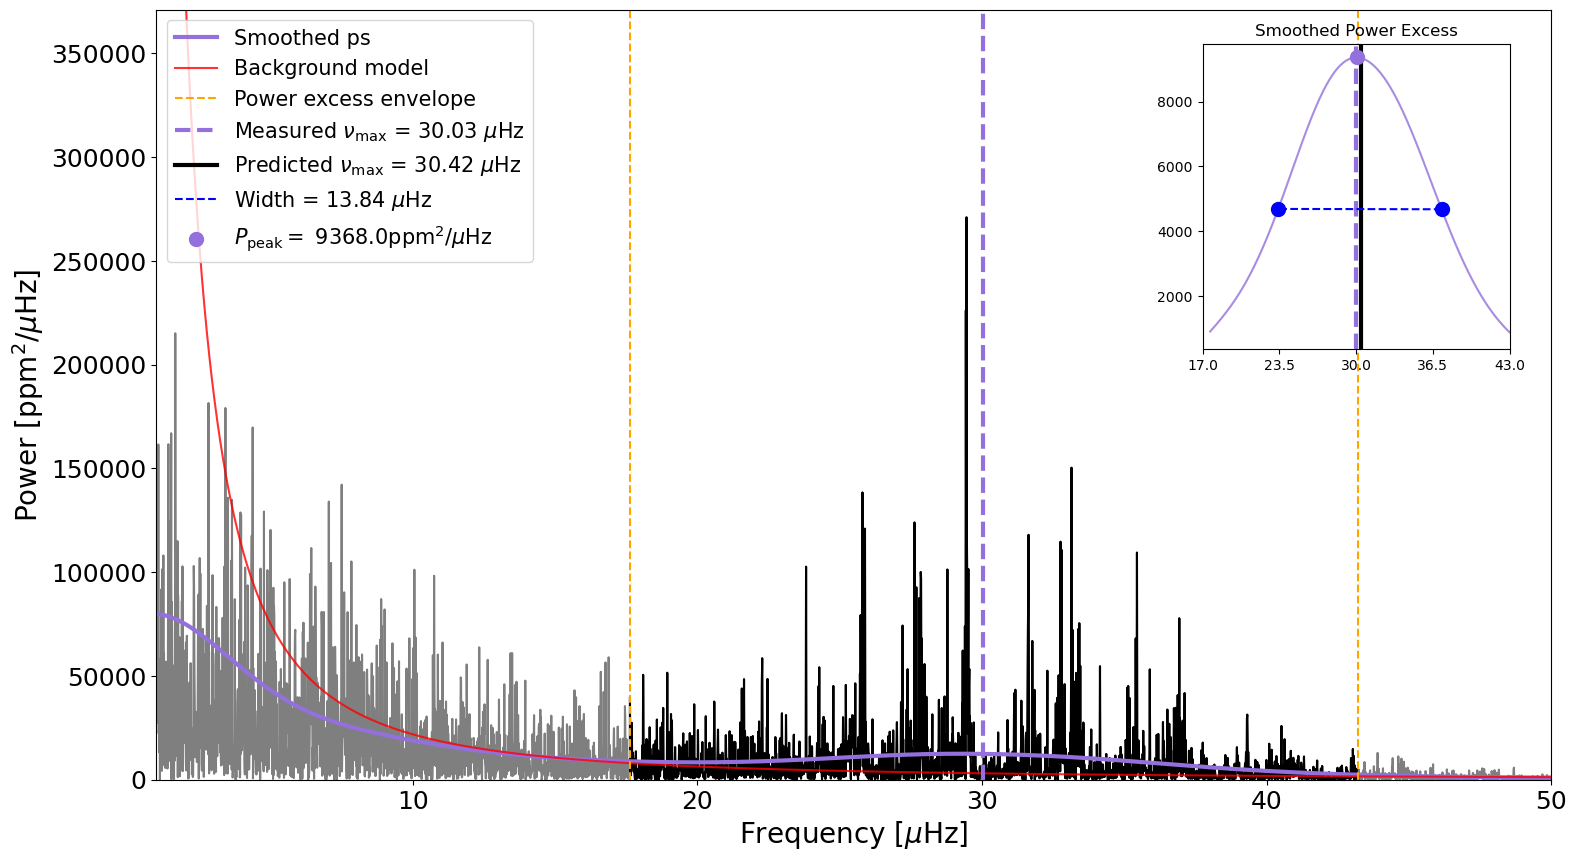

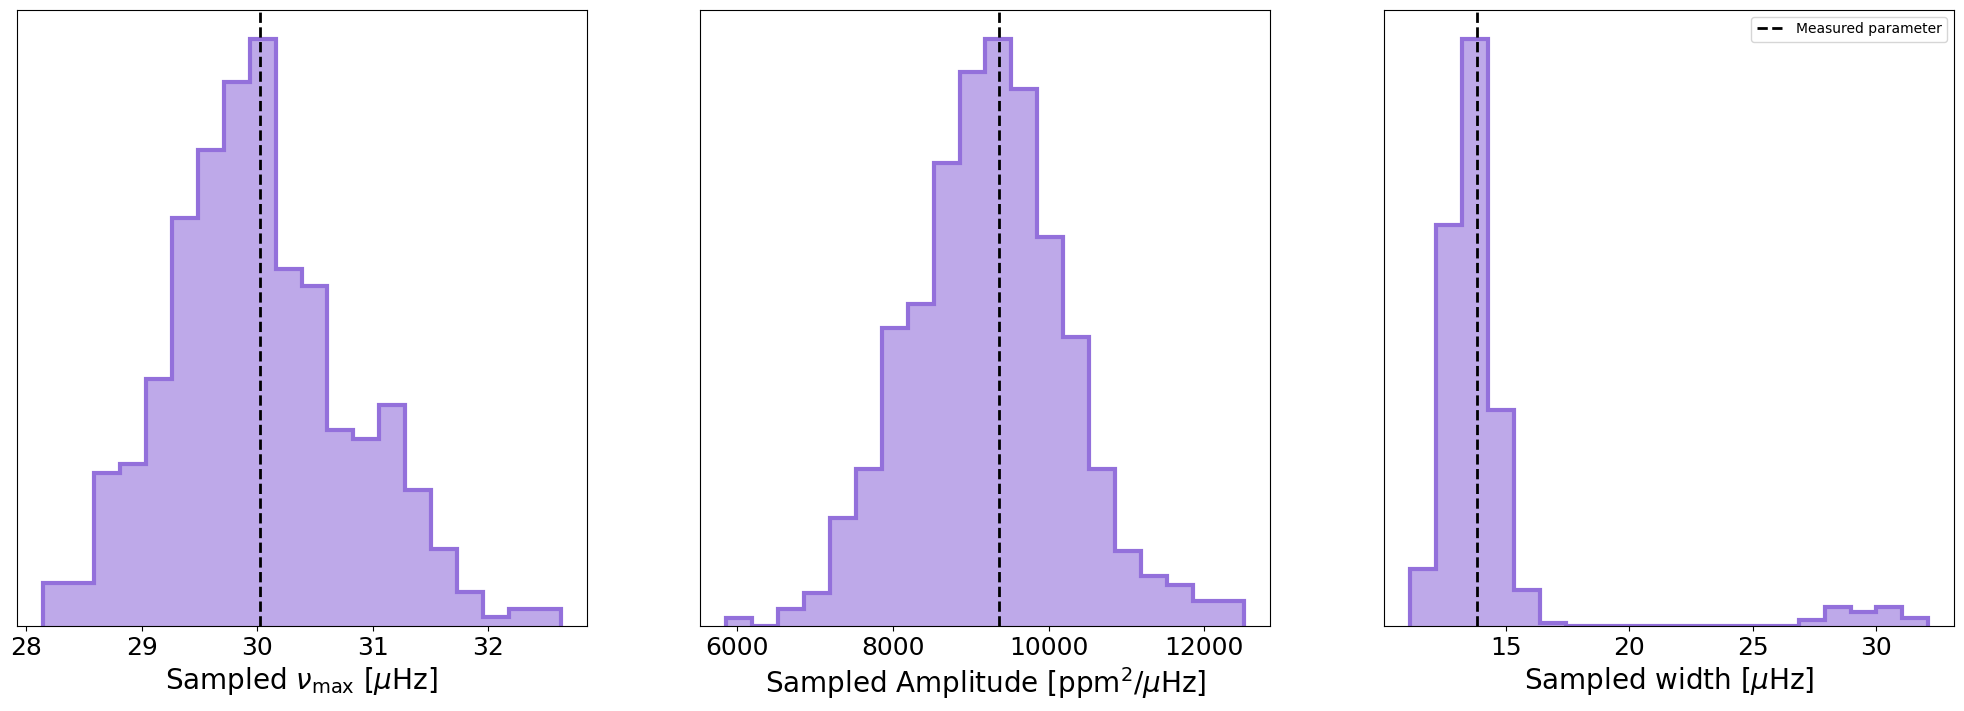

In [3]:
## Run pyMON

# Smoothing scaling parameter
sm = 2

# Lower frequency to search for power excess. If set to None, the lowerp frequency will be determined from a full width half max estimate
lowerp = None

# Upper frequency to search for power excess. If set to None, the upperp frequency will be determined from a full width half max estimate
upperp = None

# background model to fit to power spectrum. Choice between: ['nuSYD', 'harvey', 'linear', 'white']
bkg_model = 'linear'

# an estimate for numax in muHz
numax_est = 30.42  # from APOKASC3 (Pinsonneault et al., 2025)

# number of interactions for the mc uncertainty sampling routine. Default is 500. Set to '0' to not estimate uncertainties
mc_iters = 500

# either a key which points to a coefficient and exponent in a seperate file, or a coefficient+exponent in a list
# for the same dnu-numax relation as pysyd, use the keyword 'pySYD'
Dnu_relation = 'pySYD'


# save inputs as a dictionary (must be passed into pyMON as a dict with all parameters)
inputs = {'sm': sm, 'lowerp': lowerp, 'upperp': upperp, 'background_model': bkg_model, 
          'numax_est': numax_est, 'mc_iters': mc_iters, 'Dnu_relation': Dnu_relation}



pyMON_df = pyMON(frequency, power, time, Star_ID, inputs)



pyMON_df